# Analysis Notebook for the Paper: *How Can Manual Testing Processes Be Optimized?*

## Load modules and raw survey data

In [1]:
# run the command below to install required python packages
# !pip3 install pandas numpy matplotlib openpyxl

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
from typing import Dict
%matplotlib inline
plt.style.use('default')

In [3]:
survey_answers_file_path = os.path.join("..", "survey", "survey-answers_anonymized.xlsx")

## Plotting utilities

In [4]:
import textwrap
from matplotlib.ticker import MaxNLocator

primary_color = "#5c96a5"
gray_color = "#f6f6f6"
labelsize = 20
ticksize = 20
linewidth = 2.5
markersize = 8
bar_width = 0.7
box_width = 0.5
boxplot_figsize = (2, 6)

### Simple bar chart

In [5]:
def simple_barchart(data: Dict,
                    output_path: str,
                    ylabel: str = "Mentions"):
    f, ax = plt.subplots(figsize=(len(data.keys())*1.1, 5))

    ax.bar(data.keys(), data.values(), color=primary_color, width=bar_width)
    
    ax.grid(axis='y', which='both')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_axisbelow(True)
    
    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    
    plt.ylabel(ylabel, fontsize=labelsize)
       
    plt.xticks(range(len(data.keys())), [textwrap.fill(label, 16) for label in data.keys()], 
           rotation=90) #50, ha='right')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    f.tight_layout(pad=0.0)
    f.savefig(output_path)
    plt.show()

### Multi box plot

In [6]:
def multi_boxplot(data, labels, scales, output_path):
    f, ax = plt.subplots(1, len(labels), figsize=(18, 8))
    
    labelsize = 22
    ticksize = 18
    linewidth = 2.0
    markersize = 6
    
    for idx, d in enumerate(data):
        ax[idx].boxplot(d,
               patch_artist=True,
               capprops=dict(linewidth=linewidth, markersize=markersize),
               flierprops=dict(linewidth=linewidth, markersize=markersize),
               whiskerprops=dict(linewidth=linewidth, markersize=markersize),
               widths=box_width,
               boxprops=dict(
                   linewidth=linewidth,
                   facecolor=gray_color,
               ),
               meanprops=dict(
                   linewidth=linewidth,
                   markersize=markersize,
                   marker="D",
                   markerfacecolor="w",
                   markeredgecolor="k",
               ),
               medianprops=dict(linewidth=linewidth, color=primary_color))
    
        ax[idx].grid(axis='y', which='both')
        ax[idx].set_axisbelow(True)

        ax[idx].yaxis.set_tick_params(labelsize=ticksize)

        ax[idx].set_yscale(scales[idx])

        ax[idx].set_ylabel(labels[idx], fontsize=labelsize)
        
        ax[idx].set_xticks([], [])
    
    f.tight_layout(pad=3.0)
    f.savefig(output_path,
              pad_inches=0.00,
              bbox_inches="tight")
    plt.show()

## RA1: Rationale behind Manual Testing

### RQ1.1: Why is software tested manually and what technological and organizational challenges hinder test automation?

In [7]:
# read sheet
sheet_name = "T125"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c]
df = df[cols]

In [8]:
df.sum(axis=0)

High flexibility                                                                               6.0
"Intelligent test oracle"                                                                      5.0
Necessarily real worl data/user input                                                          1.0
Broader scope of test (unconscious test oracles, explorative, intended underspecification)    14.0
Cost-Efficiency                                                                                7.0
Easy / no technical skill set required                                                         3.0
Missing test automation Infra                                                                  4.0
Deep domain knowledge required to define expected behavior (oracle)                            2.0
"Real-world" data required                                                                     2.0
Domain complexity drives automation complexity                                                 2.0
High maint

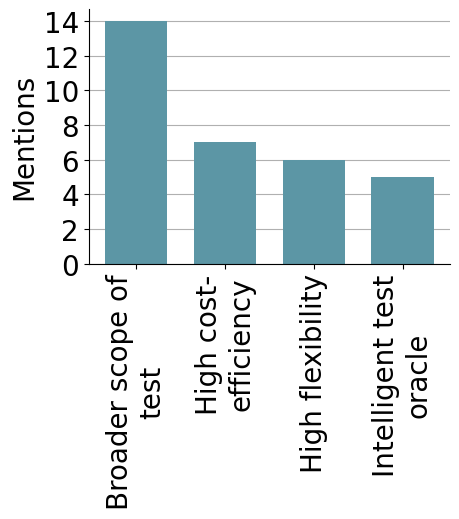

In [9]:
# advantages of manual testing
data = {
    "Broader scope of test": 14,
    "High cost-efficiency": 7,
    "High flexibility": 6,
    "Intelligent test oracle": 5
}

simple_barchart(data, "rq1-1a.pdf")

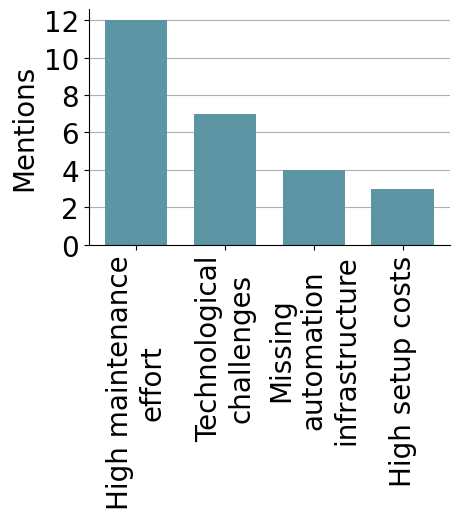

In [10]:
# disadvantages of automated testing
data = {
    "High maintenance effort": 12,
    "Technological challenges": 7,
    "Missing automation infrastructure": 4,
    "High setup costs": 3
}

simple_barchart(data, "rq1-1b.pdf")

### RQ1.2: Which testing activities are carried out manually in practice?

In [11]:
# read sheet
sheet_name = "T101"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c]
df = df[cols]

In [12]:
df.sum(axis=0)

Regression Tests                            31.0
User Acceptance Tests                       25.0
Smoke Tests                                 22.0
ExploratoryTesting                          18.0
Performance Tests                           12.0
Robustness Tests                             9.0
Interoperability Test / Integration Test     6.0
dtype: float64

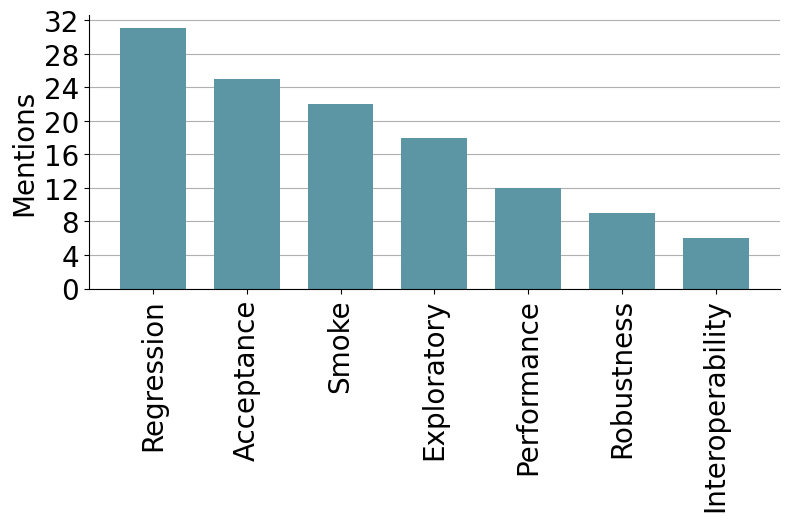

In [13]:
# Types of tests
data = {
    "Regression": 31,
    "Acceptance": 25,
    "Smoke": 22,
    "Exploratory": 18,
    "Performance": 12,
    "Robustness": 9,
    "Interoperability": 6
}

simple_barchart(data, "rq1-2.pdf")

## RA2: Characteristics of Manual Testing

### RQ2.1: How much effort is invested into manual software testing?

In [14]:
data = []
labels = []
scales = []

#### A - Test Suite Size

In [15]:
# read sheet
sheet_name = "T102"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c and "[Data]" not in c]
df = df[cols]

df = df[df['Data'].notna()]

In [16]:
d = df.to_numpy()
data.append(d)
l = "Amount of test cases"
labels.append(l)
s = "log"
scales.append(s)

#### B - Tester

In [17]:
# read sheet
sheet_name = "T103"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c and "[Data]" not in c]
df = df[cols]

df = df[df['Data'].notna()]

In [18]:
d = df.to_numpy()
data.append(d)
l = "Amount of testers"
labels.append(l)
s = "linear"
scales.append(s)

#### C - Test Cycles per Year

In [19]:
# read sheet
sheet_name = "T104"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols*
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c and "[Data]" not in c]
df = df[cols]

df = df[df['Data'].notna()]

In [20]:
d = df.to_numpy()
data.append(d)
l = "Amount of test cycles"
labels.append(l)
s = "linear"
scales.append(s)

#### D - Tests per (Major) Cycle

In [21]:
# read sheet
sheet_name = "T105"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c and "[" not in c and "Minor" not in c]
df = df[cols]

df = df[df['Major'].notna()]

In [22]:
d = df.to_numpy()
data.append(d)
l = "Amount of tests per cycle"
labels.append(l)
s = "linear"
scales.append(s)

#### E - Test Execution Time [min]

In [23]:
# read sheet
sheet_name = "T106"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c and "[" not in c and "Minor" not in c]
df = df[cols]

df = df[df['Data (avg)'].notna()]

In [24]:
d = df.to_numpy()
data.append(d)
l = "Execution time per test [min]"
labels.append(l)
s = "linear"
scales.append(s)

#### F - Execution Time Cycle

In [25]:
# read sheet
sheet_name = "T107"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c and "[" not in c and "Minor" not in c]
df = df[cols]

df = df[df['Data'].notna()]

In [26]:
d = df.to_numpy()
data.append(d)
l = "Execution time per cycle [h]"
labels.append(l)
s = "linear"
scales.append(s)

#### Multi plot

<ipython-input-6-fa0285482528>:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[idx].set_xticks([], [])
<ipython-input-6-fa0285482528>:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[idx].set_xticks([], [])
<ipython-input-6-fa0285482528>:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[idx].set_xticks([], [])
<ipython-input-6-fa0285482528>:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[idx].set_xticks([], 

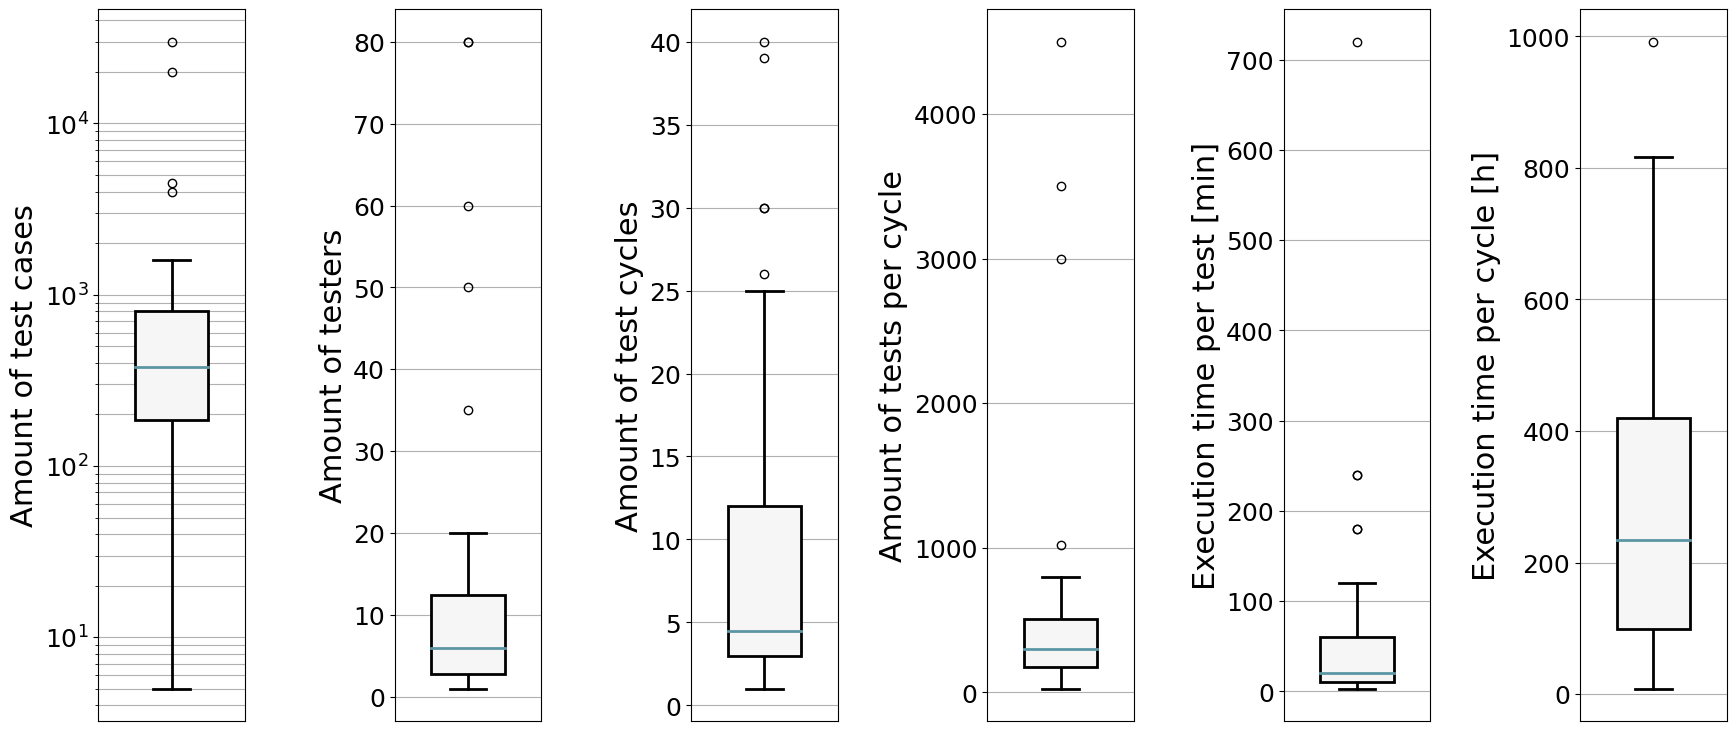

In [27]:
multi_boxplot(data, labels, scales, "rq2-1.pdf")

### RQ2.3: How are test cases selected for execution and how are tests assigned to testers?

In [28]:
# read sheet
sheet_name = "T110"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first four cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c]
df = df[cols]

In [29]:
df.sum(axis=0)

Expert Knowledge          18.0
Area of responsibility    17.0
Lead-Assignment            4.0
Self-Assignment            6.0
Random                     1.0
Time Capacity              6.0
Preferences                2.0
Alternating                1.0
No assignment              3.0
dtype: float64

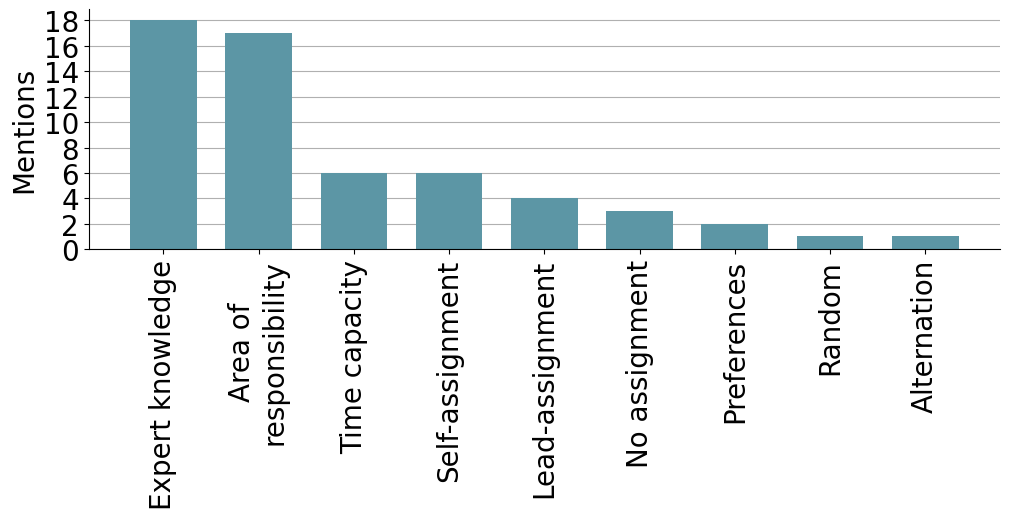

In [30]:
# Selection Strategy
data = {
    "Expert knowledge": 18,
    "Area of responsibility": 17,
    "Time capacity": 6,
    "Self-assignment": 6,
    "Lead-assignment": 4,
    "No assignment": 3,
    "Preferences": 2,
    "Random": 1,
    "Alternation": 1,
}

simple_barchart(data, "rq2-3.pdf")

### RQ2.4: What are technical and organizational characteristics of (sub-)systems that are tested manually?

In [31]:
# read sheet
sheet_name = "T120"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)

# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]

# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c]
df = df[cols]

In [32]:
df.sum(axis=0)

Developers test                              14.0
Testers are part of dev team                 12.0
Dedicated testing/V&V team                    7.0
Specialist department/Customer                7.0
External Testers (different organization)     4.0
dtype: float64

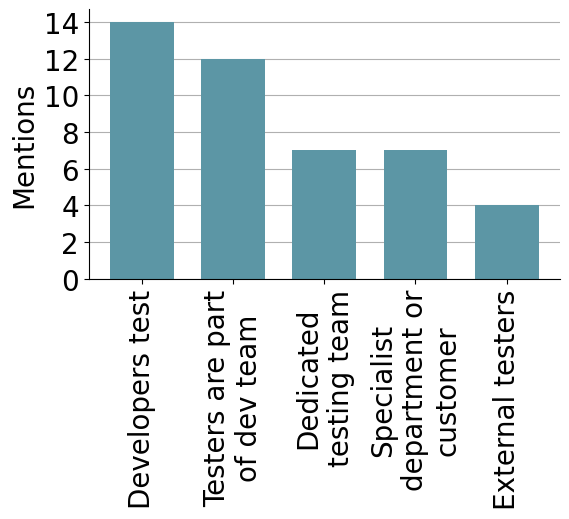

In [33]:
# Organizational testing
data = {
    "Developers test": 14,
    "Testers are part of dev team": 12,
    "Dedicated testing team": 7,
    "Specialist department or customer": 7,
    "External testers": 4
}

simple_barchart(data, "rq2-4.pdf")

## RA3: Optimization Techniques in Manual Testing

### RQ3.1: Do manual test teams aim at test automation? How much time do they plan to invest?

In [34]:
# read sheet
sheet_name = "A107"
df = pd.read_excel(survey_answers_file_path, sheet_name=sheet_name)
# remove first two cols (case, A/TXXX)
df = df.iloc[:, 2:]
# drop all aggregation and empty cols
cols = [c for c in df.columns if "Sum of" not in c and "Unnamed" not in c and "Quote" not in c]
df = df[cols]

In [35]:
df.sum(axis=0)

higher manual test effort                          2.0
lower manual test effort                           8.0
more targeted testing with the same effort         6.0
higher degree of automation                       12.0
selection strategy (e.g., risk-based approach)     2.0
Change of responsibility                           1.0
no change                                          3.0
dtype: float64

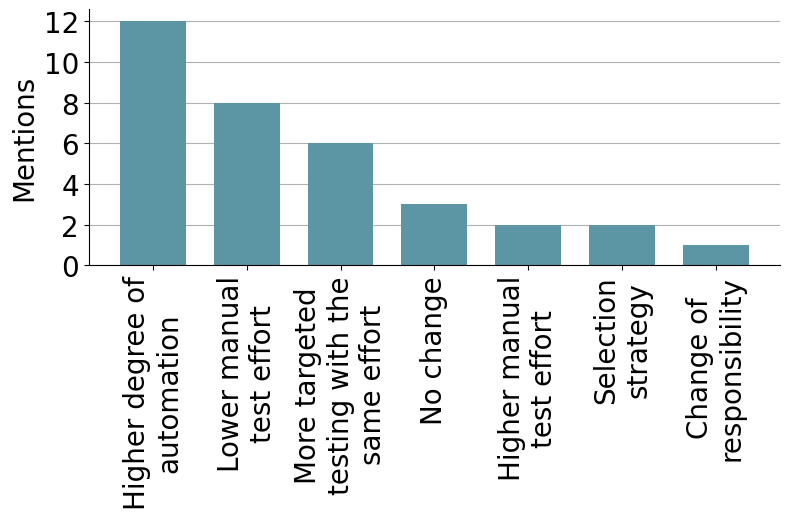

In [36]:
data = {
    "Higher degree of automation": 12,
    "Lower manual test effort": 8,
    "More targeted testing with the same effort": 6,
    "No change": 3,
    "Higher manual test effort": 2,
    "Selection strategy": 2,
    "Change of responsibility": 1
}
simple_barchart(data, "rq3-1.pdf")